# ECE 657A - Assignment 1
**Date Submitted:** February 04, 2022

In [99]:
# Data Manipulation
import pandas as pd
import numpy as np

# Charting
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import bokeh as bk
from scipy import stats

# Misc
import warnings
warnings.filterwarnings("ignore")

# Abalone Dataset

### Question 1: Assessment of Data
We begin by looking at the features of the dataset itself.

In [10]:
#Columns/Features of Dataset
column=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
#Loading the Data set

abalone_df=pd.read_csv('abalone.csv',names=column)

### 1 : Exploratory Data Analysis

In [11]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
print(abalone_df.shape)
abalone_df.describe()

(4177, 9)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [13]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [15]:
categories_abalone['Sex']=abalone_df[['Sex']].apply(encode_gender,axis=1)#applying one hot encoding
categories_abalone.head() #checking to see if data has the proper one hot encoded categories

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Feature Analysis 

### Univariate Analysis

#### Gender distribution

Text(0.5, 1.0, 'Percentage distribution of the category (SEX)')

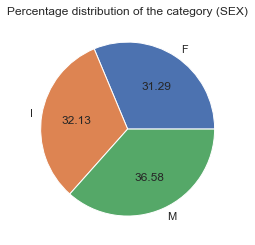

In [17]:
abalone_df.groupby('Sex').size().plot(kind='pie', autopct='%.2f')
plt.ylabel("")
plt.title("Percentage distribution of the category (SEX)")

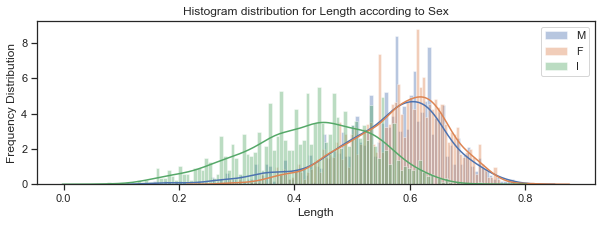

In [19]:
# Histogram of length on basis of sex
plt.figure(figsize=(10,3))
sns.distplot(abalone_df.loc[abalone_df['Sex']=='M']['Length'],bins=100,kde=True,label="M")
sns.distplot(abalone_df.loc[abalone_df['Sex']=='F']['Length'],bins=100,kde=True,label="F")
sns.distplot(abalone_df.loc[abalone_df['Sex']=='I']['Length'],bins=100,kde=True,label="I")
plt.legend()
plt.title("Histogram distribution for Length according to Sex")
plt.xlabel("Length")
plt.ylabel("Frequency Distribution")
plt.show()

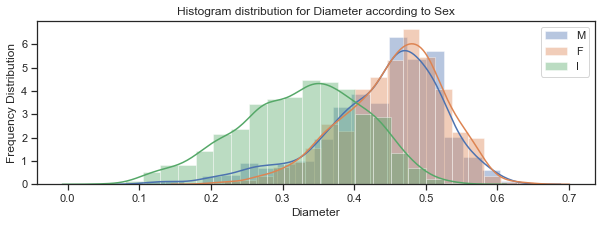

In [24]:
# Histogram of diameter on basis of sex
plt.figure(figsize=(10,3))
sns.distplot(abalone_df.loc[abalone_df['Sex']=='M']['Diameter'],bins=20,kde=True,label="M")
sns.distplot(abalone_df.loc[abalone_df['Sex']=='F']['Diameter'],bins=20,kde=True,label="F")
sns.distplot(abalone_df.loc[abalone_df['Sex']=='I']['Diameter'],bins=20,kde=True,label="I")
plt.legend()
plt.title("Histogram distribution for Diameter according to Sex")
plt.xlabel("Diameter")
plt.ylabel("Frequency Distribution")
plt.show()

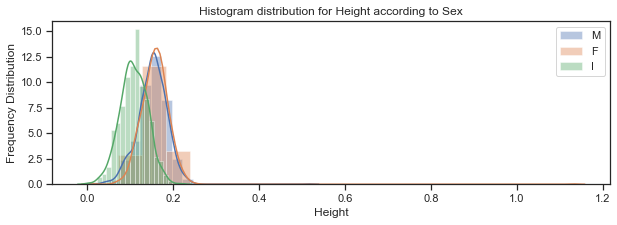

In [23]:
# Histogram of height on basis of sex
plt.figure(figsize=(10,3))
sns.distplot(abalone_df.loc[abalone_df['Sex']=='M']['Height'],bins=20,kde=True,label="M")
sns.distplot(abalone_df.loc[abalone_df['Sex']=='F']['Height'],bins=20,kde=True,label="F")
sns.distplot(abalone_df.loc[abalone_df['Sex']=='I']['Height'],bins=20,kde=True,label="I")
plt.legend()
plt.title("Histogram distribution for Height according to Sex")
plt.xlabel("Height")
plt.ylabel("Frequency Distribution")
plt.show()

#### Weight measurements analysis

Text(0, 0.5, 'Count')

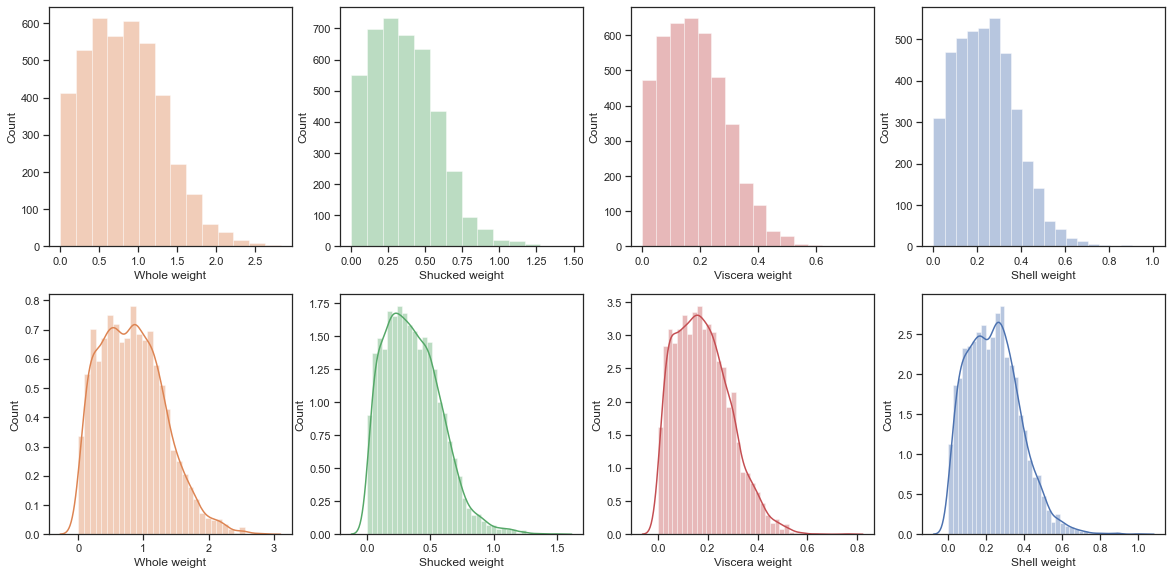

In [33]:
plt.figure(figsize=(20, 15))
colors = sns.color_palette()

rows = 3
cols = 4
i = 0

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_df['Whole weight'], kde=False, bins=14, color=colors[i % cols])
plt.xlabel("Whole weight")
plt.ylabel("Count")
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_df['Shucked weight'], kde=False, bins=14, color=colors[i % cols])
plt.xlabel("Shucked weight")
plt.ylabel("Count")

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_df['Viscera weight'], kde=False, bins=16, color=colors[i % cols])
plt.xlabel("Viscera weight")
plt.ylabel("Count")

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_df['Shell weight'], kde=False, bins=20, color=colors[i % cols])
plt.xlabel("Shell weight")
plt.ylabel("Count")
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_df['Whole weight'], color=colors[i % cols])
plt.xlabel("Whole weight")
plt.ylabel("Count")
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_df['Shucked weight'], color=colors[i % cols])
plt.xlabel("Shucked weight")
plt.ylabel("Count")

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_df['Viscera weight'], color=colors[i % cols])
plt.xlabel("Viscera weight")
plt.ylabel("Count")

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_df['Shell weight'], color=colors[i % cols])
plt.xlabel("Shell weight")
plt.ylabel("Count")



#### Rings distribution

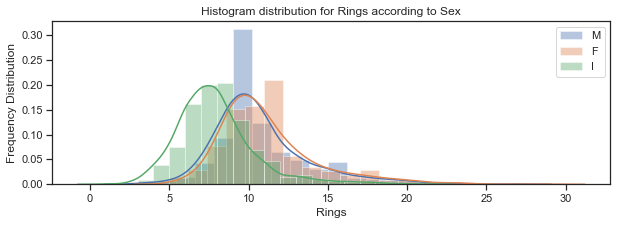

In [34]:
# Histogram of height on basis of sex
plt.figure(figsize=(10,3))
sns.distplot(abalone_df.loc[abalone_df['Sex']=='M']['Rings'],bins=20,kde=True,label="M")
sns.distplot(abalone_df.loc[abalone_df['Sex']=='F']['Rings'],bins=20,kde=True,label="F")
sns.distplot(abalone_df.loc[abalone_df['Sex']=='I']['Rings'],bins=20,kde=True,label="I")
plt.legend()
plt.title("Histogram distribution for Rings according to Sex")
plt.xlabel("Rings")
plt.ylabel("Frequency Distribution")
plt.show()

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 432x288 with 0 Axes>

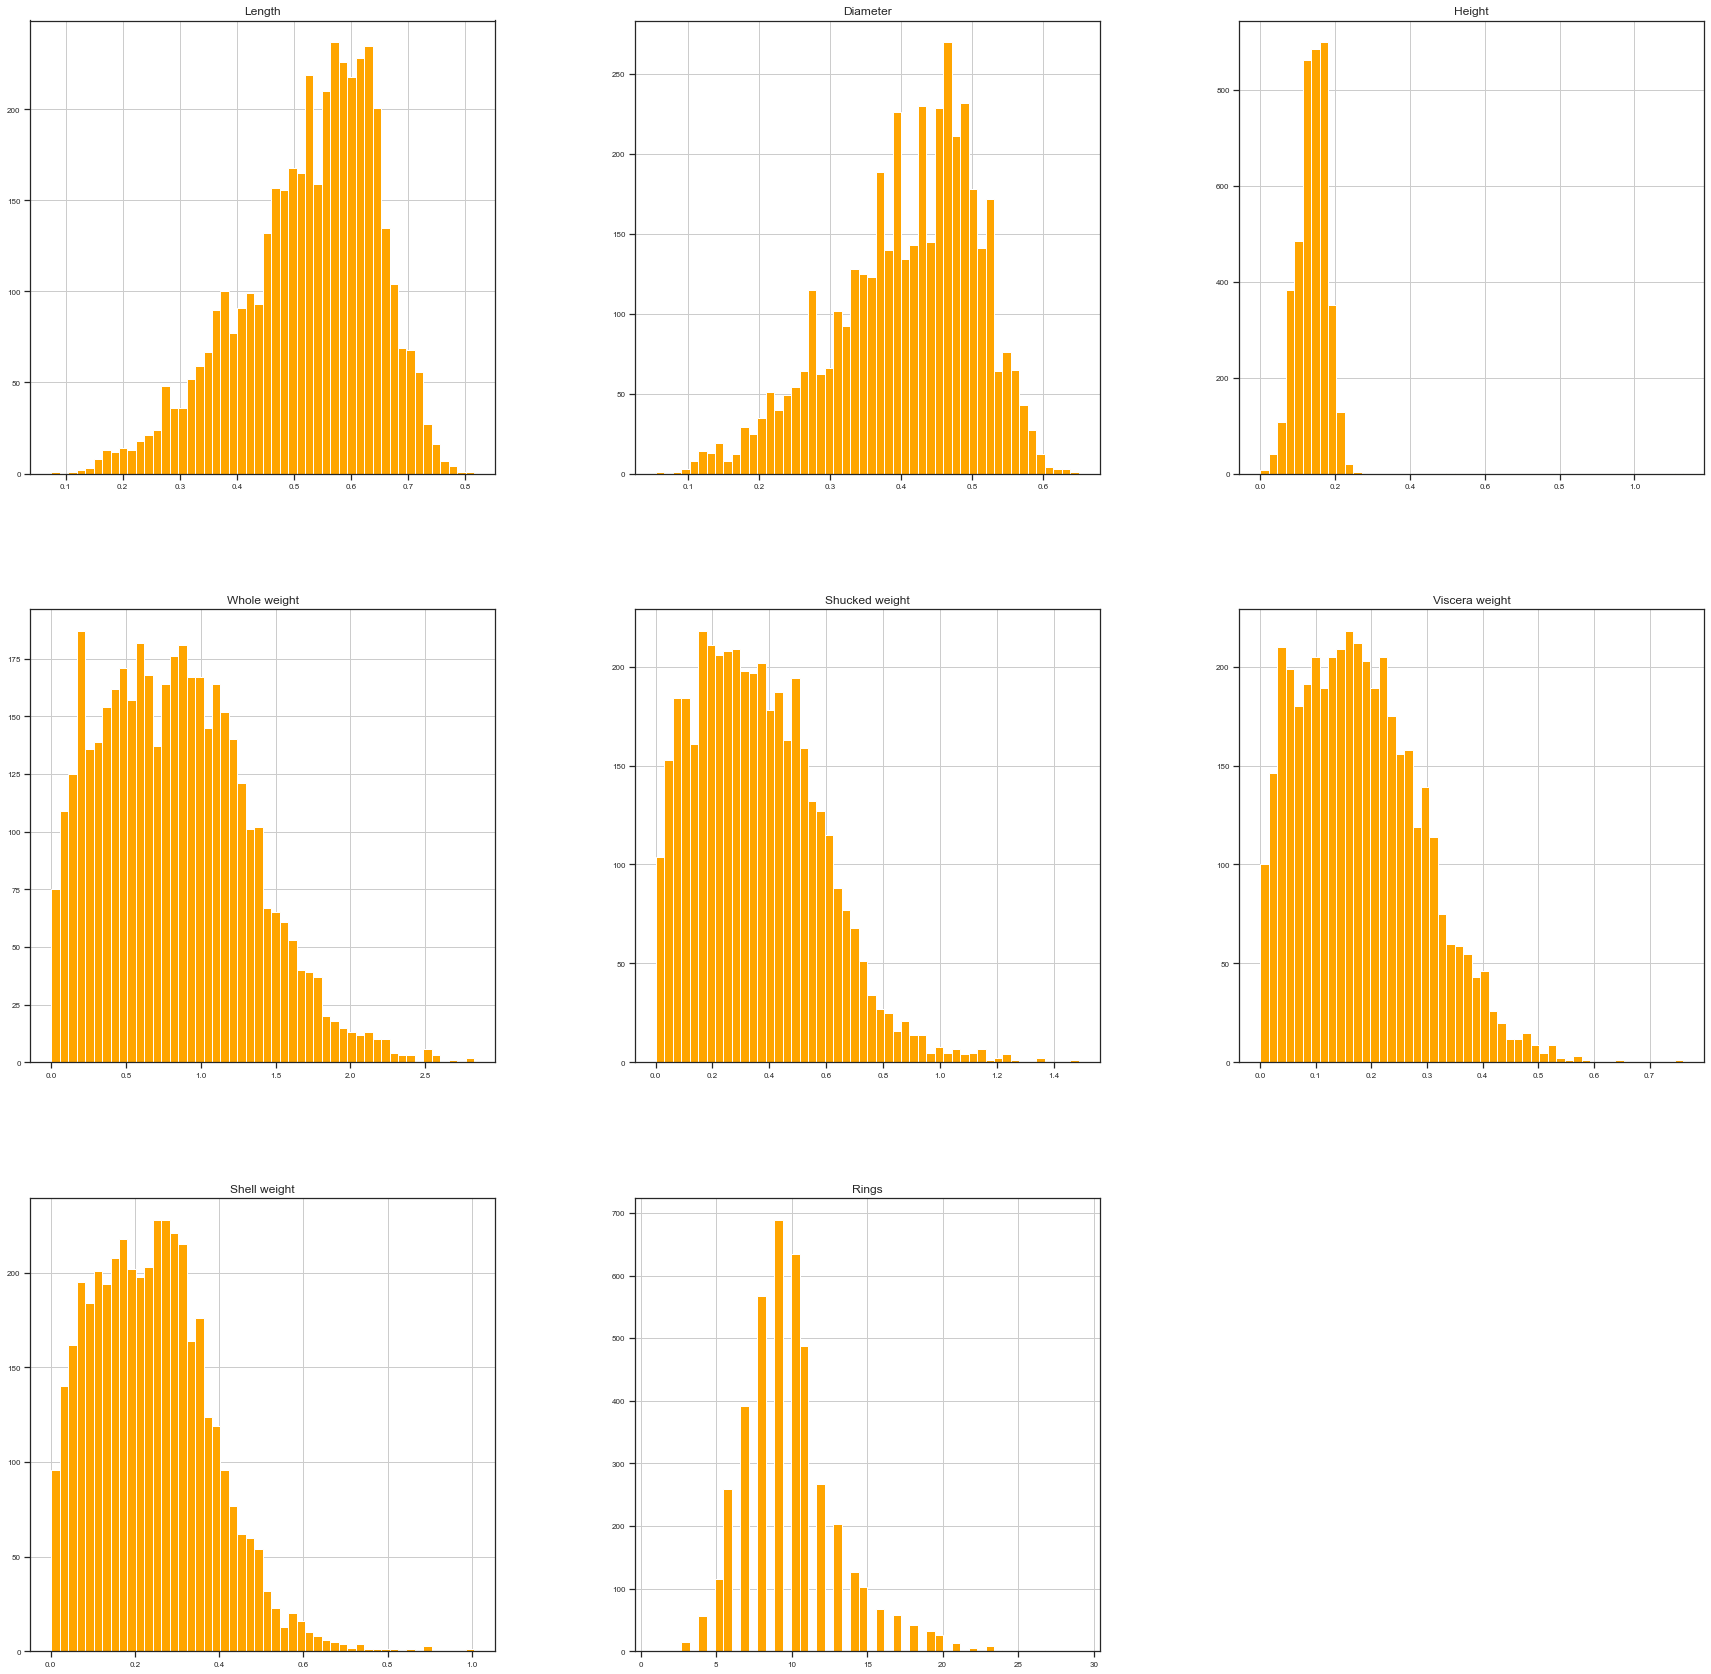

In [41]:
plt.figure()
abalone_df.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8, color = "orange")

### Bivariate Analysis

To see the comparison of any two features with respect to the category, we will make pair plots.

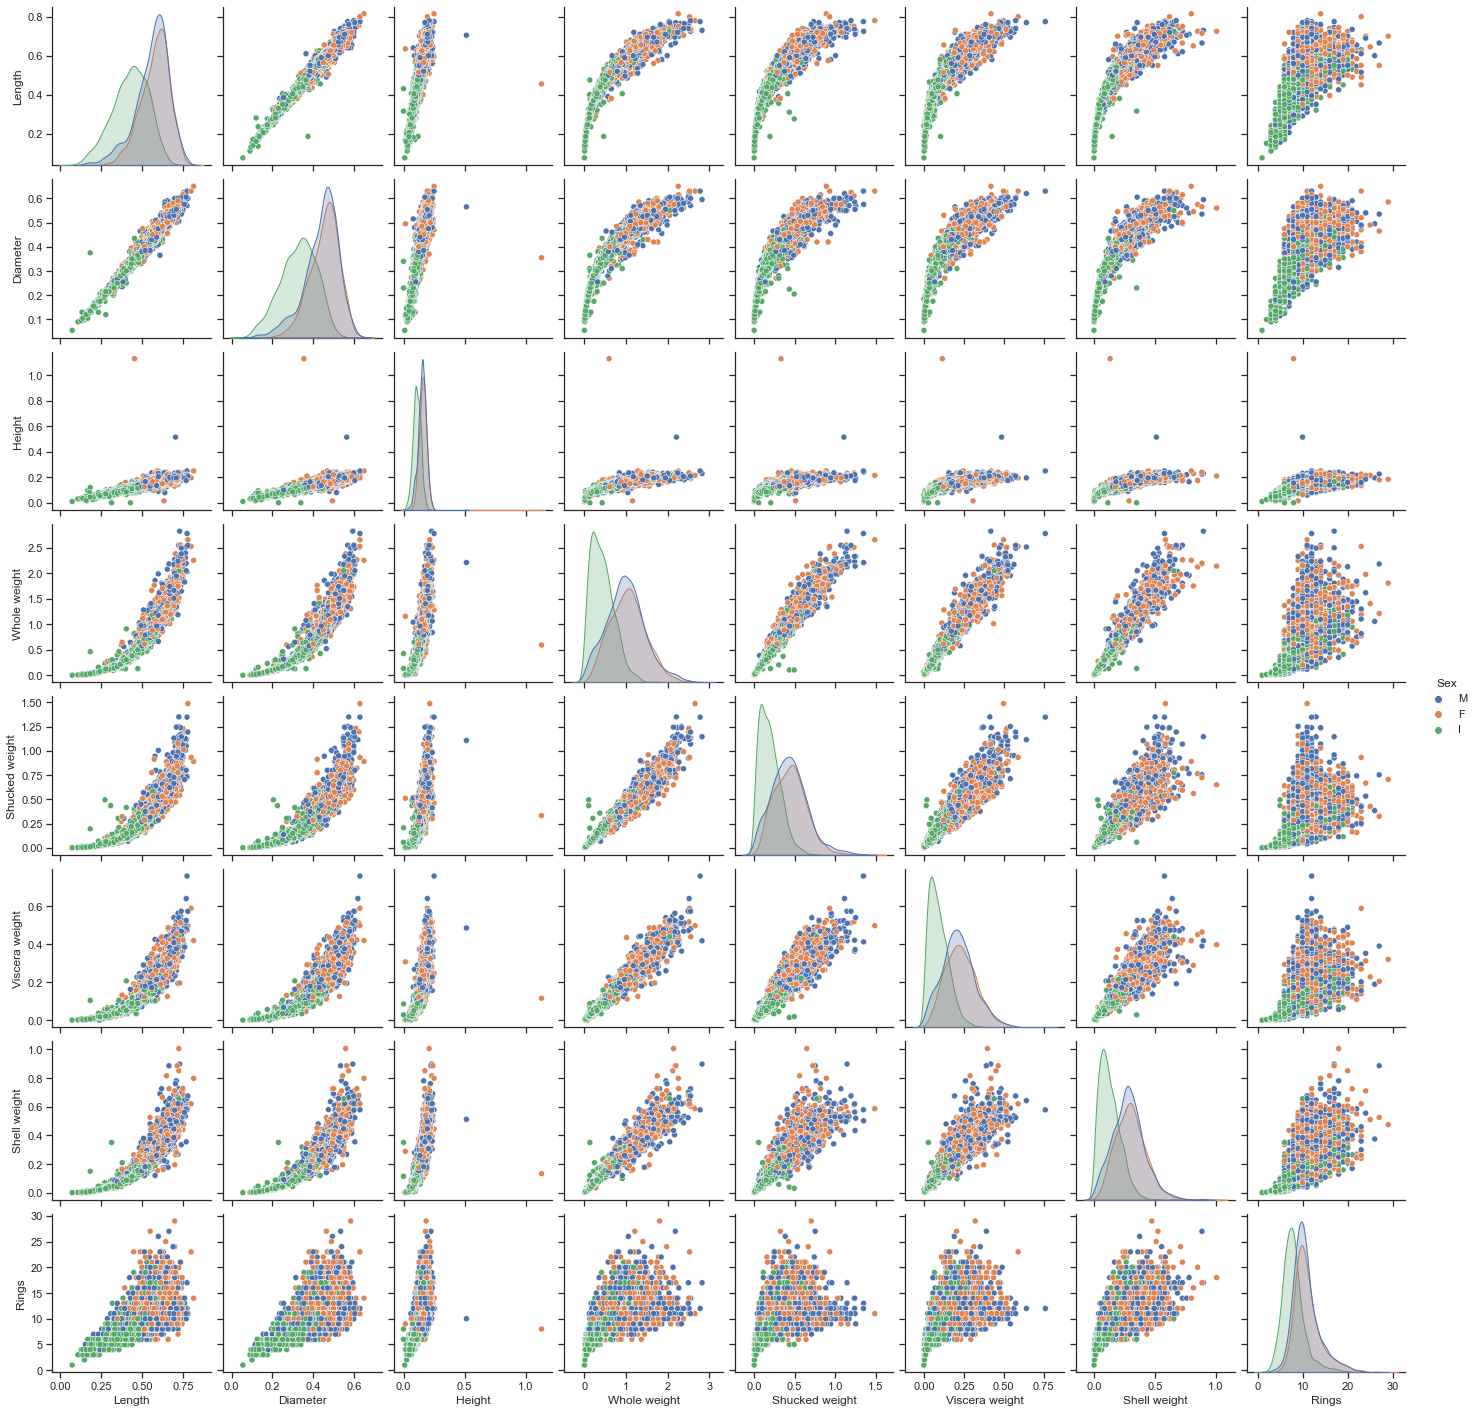

In [42]:
# Plotting the Pair-plots for all numerical columns with respect to each other categorised by the sex column
sns.pairplot(abalone_df, hue="Sex", vars=('Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'))

Making a heatmap to find correlated fields in the dataset

<AxesSubplot:>

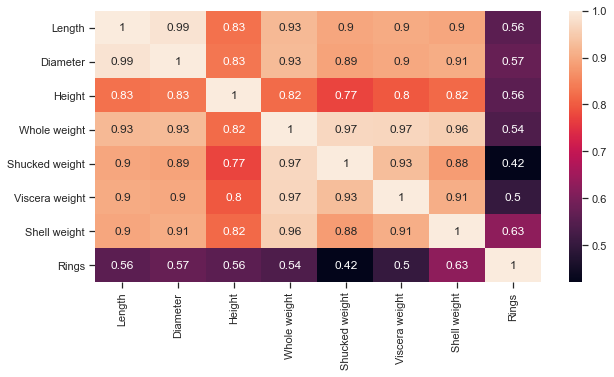

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(abalone_df.corr(method='pearson'),annot=True)

### 2 Do we have any missing data?

In [78]:
abalone_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### Diversity of Data

Removing the categorical data to plot the outliers using box plots

<AxesSubplot:>

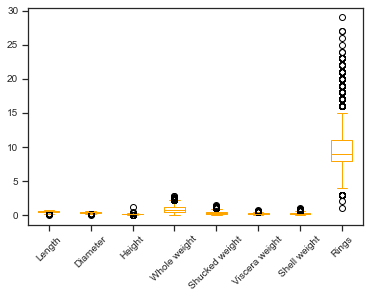

In [103]:
cols_drop_df= categories_abalone.drop(columns=['Sex'])
pd.plotting.boxplot(cols_drop_df, grid=False, rot=45, fontsize=10, color="orange")

We will drop the 'Rings' column as it's range is totally different

<AxesSubplot:>

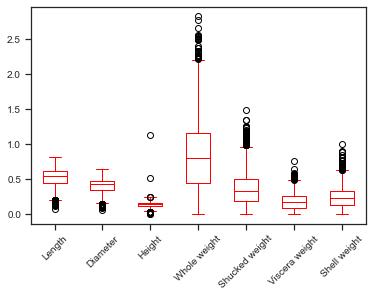

In [83]:
cols_drop_df3= cols_drop_df.drop(columns=['Rings'])
pd.plotting.boxplot(cols_drop_df3, grid=False, rot=45, fontsize=10, color="red")

We will drop whole weight and height columns as their range is out of range creating an uneven boxplot

<AxesSubplot:>

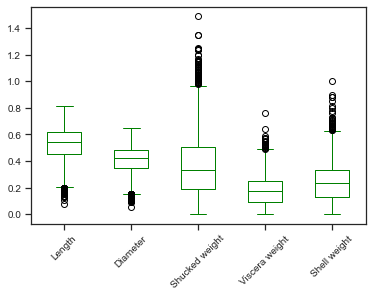

In [85]:
cols_drop_df1 = cols_drop_df3.drop(columns=['Whole weight','Height'])
pd.plotting.boxplot(cols_drop_df1, grid=False, rot=45, fontsize=10, color="green")

### 4 Outliers

In [61]:
encoded_abalone.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:>

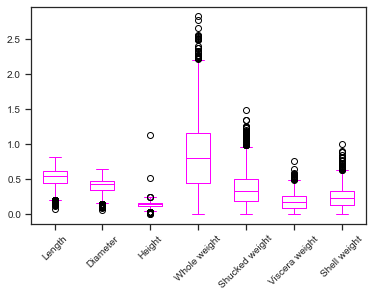

In [87]:
cols_drop_df= categories_abalone.drop(columns=['Sex','Rings'])#removing category and target value
pd.plotting.boxplot(cols_drop_df, grid=False, rot=45, fontsize=10, color="magenta")

We can clearly see some outliers in the ranges, to show it more prominently we'll plot separate boxplots for range.

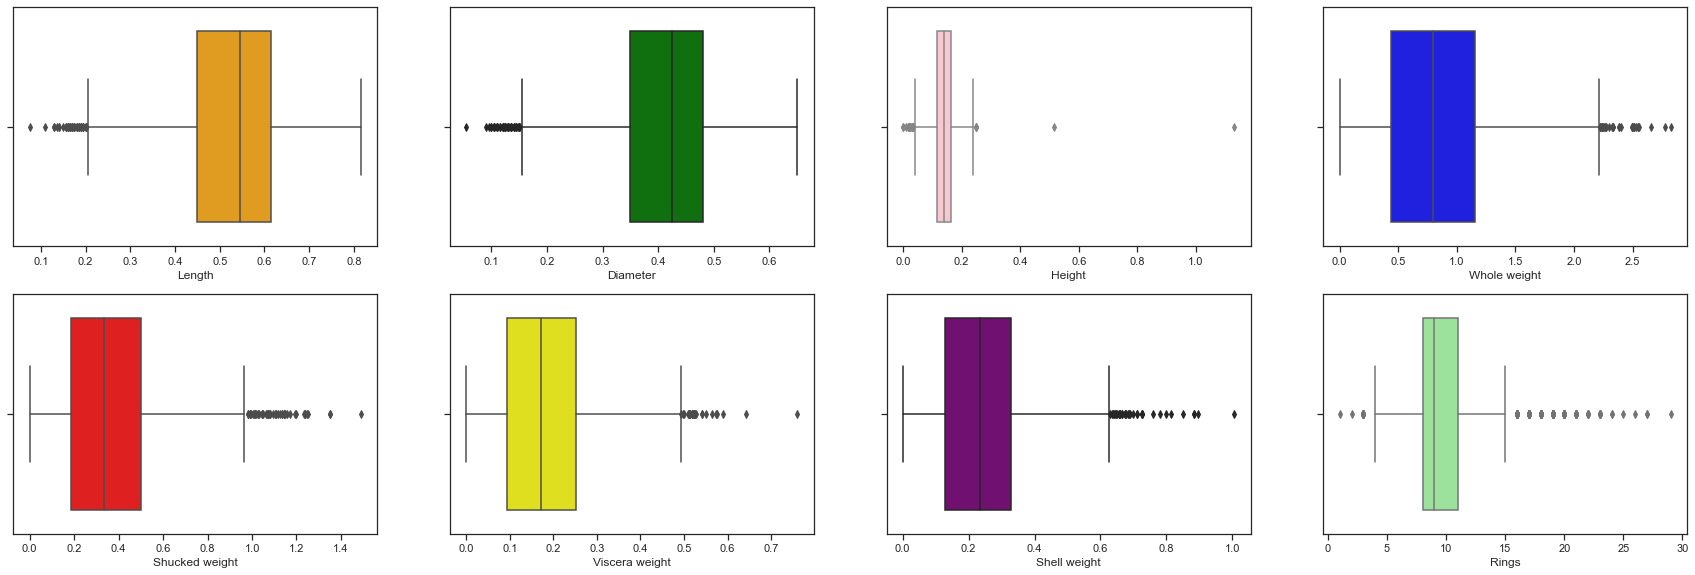

In [76]:
plt.figure(figsize=(30, 15))

rows = 3
cols = 4
i = 0


i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(cols_drop_df2['Length'], color="orange")

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(cols_drop_df2['Diameter'], color="green")

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(cols_drop_df2['Height'], color="pink")

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(cols_drop_df2['Whole weight'], color="blue")

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(cols_drop_df2['Shucked weight'], color="red")

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(cols_drop_df2['Viscera weight'], color="yellow")

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(cols_drop_df2['Shell weight'], color="purple")

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(cols_drop_df['Rings'], color="lightgreen")


### 5 Is our data set balanced?

In [77]:
abalone_df.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [89]:
sex=pd.get_dummies(abalone_df['Sex'])

In [90]:
abalone_df.drop(['Sex'],axis=1,inplace=True)
abalone_df=pd.concat([abalone_df,sex],axis=1)

In [91]:
abalone_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


<AxesSubplot:xlabel='Rings', ylabel='count'>

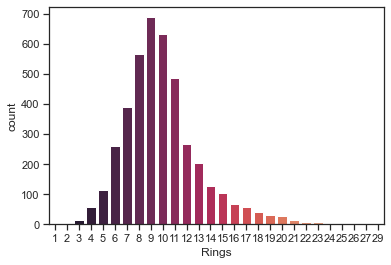

In [95]:
sns.countplot(x=abalone_df['Rings'],data=abalone_df, palette='rocket')

We can clearly see that the count plot that is made is skewed in the distribution which means data is unbalanced.

### 6 Normalization

### Before Normalization


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>]],
      dtype=object)

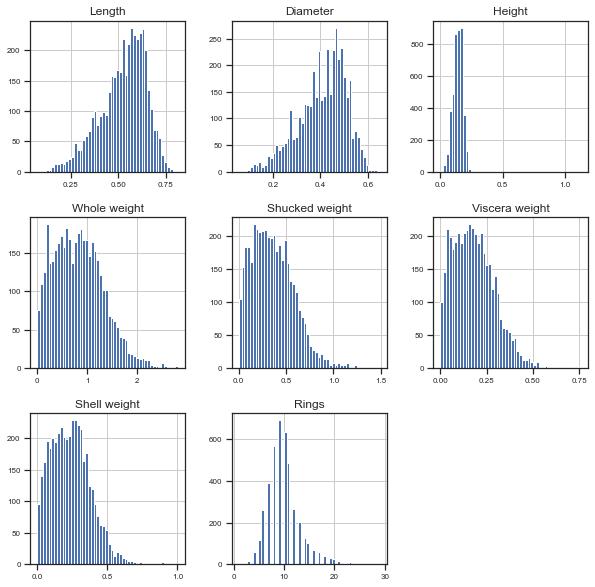

In [150]:
cols_drop_df.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)

### After Normalization

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 432x288 with 0 Axes>

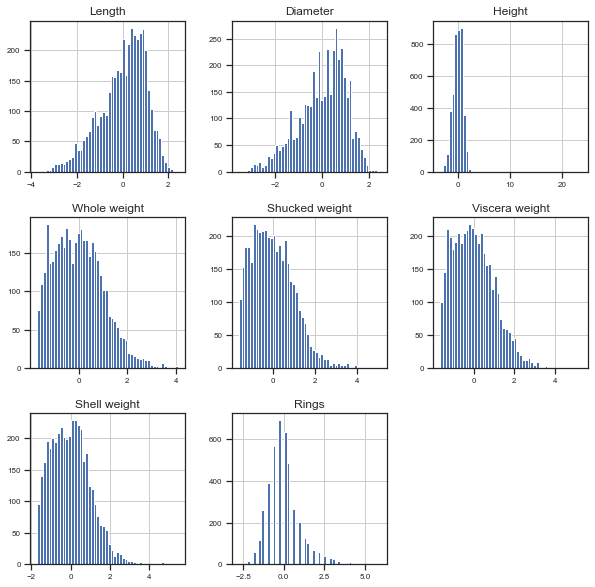

In [104]:
# Z-score with Normalization
plt.figure()
abalone_znormalized = cols_drop_df.apply(stats.zscore)
abalone_znormalized.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)

### Min-max Normalization


In [130]:
cols_drop_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [142]:
#Minmax normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
cols = list(cols_drop_df.columns)
scaler_minmax = MinMaxScaler()
features_data_x = cols_drop_df.drop('Rings', axis = 1).values
target_y = cols_drop_df['Rings'].values

X_minmax = scaler_minmax.fit_transform(features_data_x)

In [143]:
#Dataframe of minmax normalized data
abalone_minmax = pd.DataFrame(data=np.column_stack((X_minmax,target_y)),columns=cols)

It is very clear that the normalization still preserve the shape of the data for all predictors, however, on different scale. all data points were shifted to be centered around the zero and with unit variance)

### 6(a) Is normalization needed?
Yes, normalization is absolutely needed for this dataset. 
The reasons are as follows:
The data has different ranges and it 

### 6(b,c) Unormalized Comparison of three values
To make the difference that normalization makes on interpretation clear we look at some specific examples, choosing one continuous value, such as *Rings*, sorting it so that it have a meaningful pattern, and then comparing to two other numerical features under differnet normalization schemes. The other two features are Whole weight, Shucked weight

In [144]:
# Plot one feature value, sorted from low to high, against two others
x=['Diameter']; y=['Whole weight','Shell weight']

In [146]:
aba_aqc = cols_drop_df[x+y]
aba_aqc.sort_values(by=x, inplace=True)
display(aba_aqc.describe())

,Diameter,Whole weight,Shell weight
count,4177.000000,4177.000000,4177.000000
mean,0.407881,0.828742,0.238831
std,0.099240,0.490389,0.139203
min,0.055000,0.002000,0.001500
25%,0.350000,0.441500,0.130000
50%,0.425000,0.799500,0.234000
75%,0.480000,1.153000,0.329000
max,0.650000,2.825500,1.005000


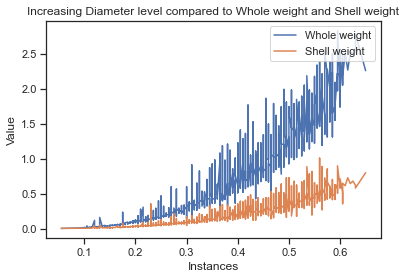

In [147]:
aba_aqc.plot(x=x[0], y=y)
# aba_aqc.hist(column=y, bins=10, alpha=.5)

plt.legend(loc='upper right')
plt.title('Increasing {} level compared to {} and {}'.format(x[0],y[0],y[1]))
plt.xlabel('Instances')
plt.ylabel('Value')
plt.legend(loc='upper right')


When we look at Whole weight and Shucked weight as they correlate with 
Rings we see a major need for normalization. 

### 6(d) Using Z-Score Normalization

We implement z-score normalization using the `sklearn.stats` package applied to the entire dataset. Then we once again select out the columns of interest. Note that the x and y variables do not need to be updated since they are just the names of the columns being used and they do not change across the three examples.

In [148]:
abalone_zscore = cols_drop_df.loc[:, cols_drop_df.columns!= abalone_target].apply(stats.zscore)
abalone_zscore[abalone_target] = cols_drop_df[abalone_target] 
aba_aqc_zscore = abalone_zscore[x+y]

In [149]:
abalone_zscore.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,15
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,7
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,9
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,10
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,7


In [151]:
aba_aqc_zscore.sort_values(by=x, inplace=True)
display(aba_aqc_zscore.describe())

,Diameter,Whole weight,Shell weight
count,4.177000e+03,4.177000e+03,4.177000e+03
mean,1.053077e-15,4.231446e-16,7.601719e-16
std,1.000120e+00,1.000120e+00,1.000120e+00
min,-3.556267e+00,-1.686092e+00,-1.705134e+00
25%,-5.833158e-01,-7.897577e-01,-7.819095e-01
50%,1.725193e-01,-5.963767e-02,-3.470794e-02
75%,7.267984e-01,6.613049e-01,6.478319e-01
max,2.440025e+00,4.072271e+00,5.504642e+00


<Figure size 432x288 with 0 Axes>

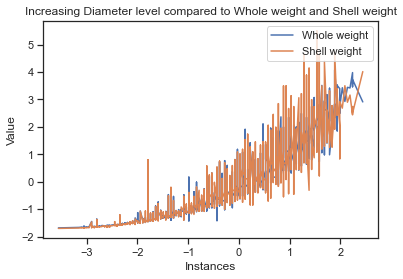

In [152]:
plt.figure()
aba_aqc_zscore.sort_values(by=x, inplace=True)
aba_aqc_zscore.plot(x=x[0], y=y)
plt.legend(loc='upper right')
plt.title('Increasing {} level compared to {} and {}'.format(x[0],y[0],y[1]))
plt.xlabel('Instances')
plt.ylabel('Value')
plt.legend(loc='upper right')

### Using min-max Normalization
This we simply implement ourselves since the formula is straightforward. the min() and max() functions will produce vectors of the respective values for every feature, then the formula below will normalize all the values of the new wine-minmax matrix appropriately. 

In [153]:
abalone_minmax.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,15.0
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,7.0
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,9.0
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,10.0
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,7.0


We can already see a significant difference here from the zscore summary tables, there are no very small or very large numbers any longer, these result from he large differences in scale and variance of the two feautures which zscore preserves.

<Figure size 432x288 with 0 Axes>

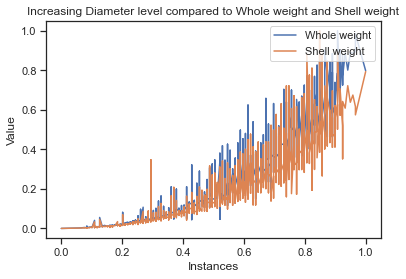

In [155]:
plt.figure()
abalone_minmax.sort_values(by=x, inplace=True)
abalone_minmax.plot(x=x[0], y=y)

plt.legend(loc='upper right')
plt.title('Increasing {} level compared to {} and {}'.format(x[0],y[0],y[1]))
plt.xlabel('Instances')
plt.ylabel('Value')
plt.legend(loc='upper right')

# Wine Quality Data Set

In [29]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy() # Why?
wine_w[C]= np.zeros(wine_w.shape[0],dtype=int)
wine_r[C]= np.ones(wine_r.shape[0],dtype=int)
wine = pd.concat([wine_w,wine_r])

In [4]:
#Let's see what kind of features we have. 
wine.info()
print(wine.shape, wine_r.shape, wine_w.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB
(6497, 13) (1599, 13) (4898, 13)


<Figure size 432x432 with 0 Axes>

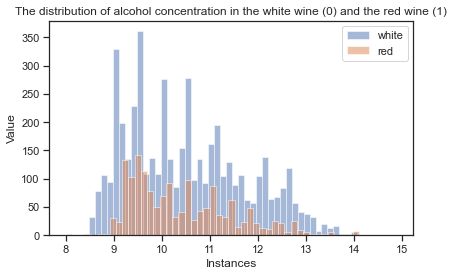

In [5]:
plt.figure(figsize=(6,6))
col='alcohol'
aw = wine_w.hist(column=col, bins=50, alpha=0.5, label="white")
wine_r.hist(column=col, bins=50, alpha=0.5, label="red", ax=aw)

plt.title('The distribution of {} concentration in the white wine (0) and the red wine (1)'.format(col))
plt.xlabel('Instances')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.grid()

plt.tight_layout()
plt.show()

In [6]:
#Checking for any null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

It seems there are no zeros or null entries in the dataset. To be more sure we can look at a scatterplot of all the data, and we see that there do not seem to be any large holes or irregular missing blocks. The bands of points for `quality` and `color` are the result of those features having a discrete set of values, they are categorical variables.

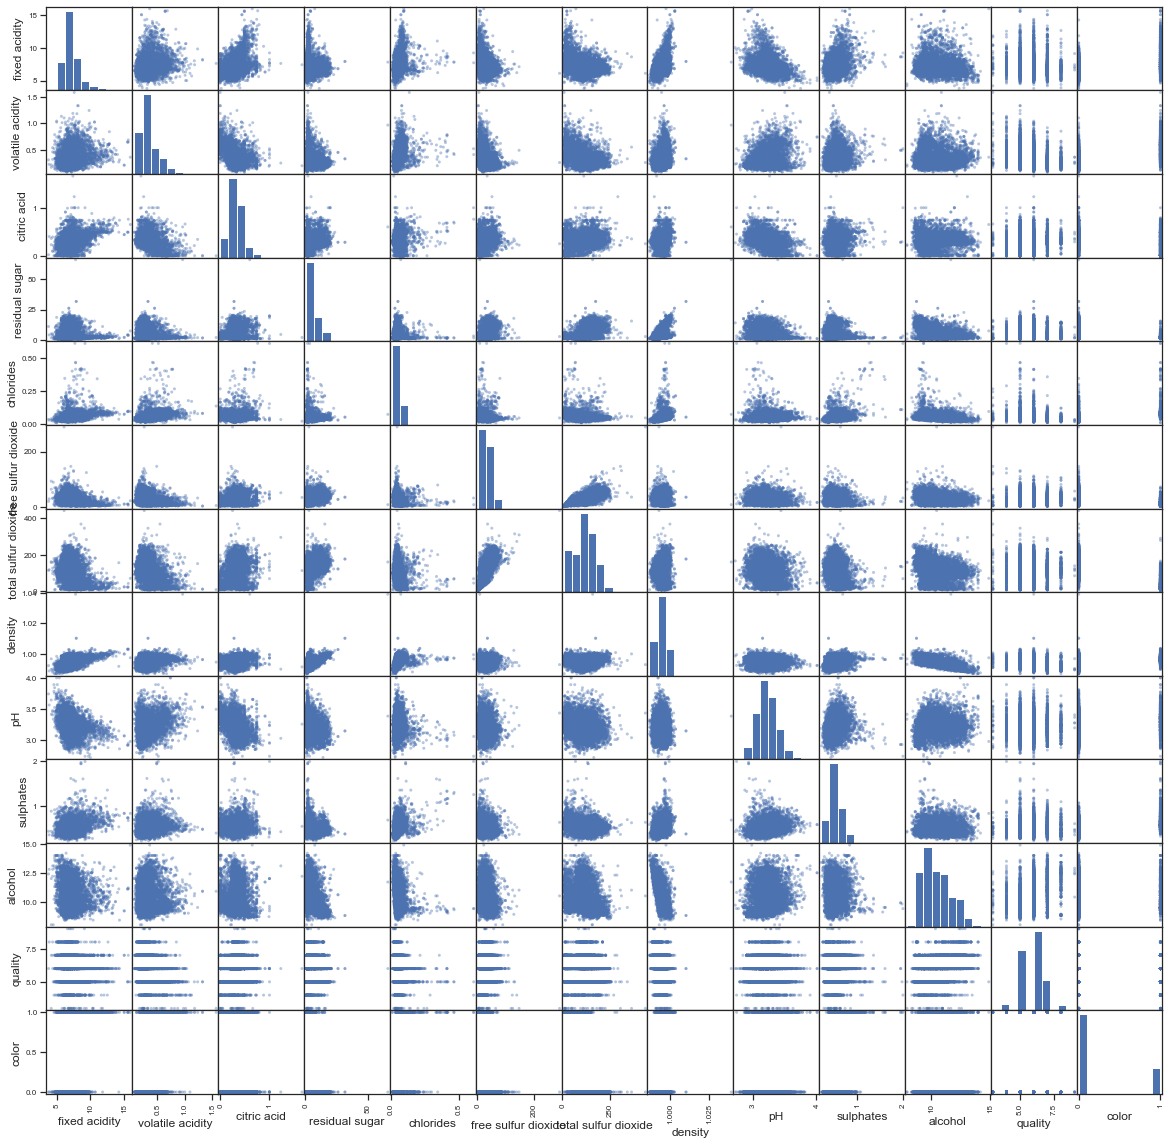

In [7]:
fig = pd.plotting.scatter_matrix(wine, alpha=0.4, figsize=(20,20))

<AxesSubplot:>

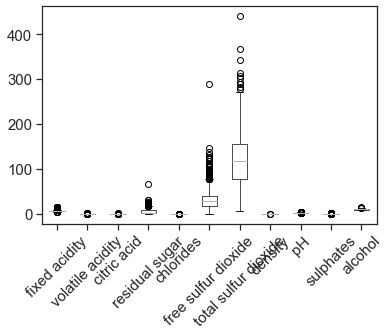

In [8]:
x = wine.drop(columns=['color', 'quality'])
pd.plotting.boxplot(x, grid=False, rot=45, fontsize=15)

<AxesSubplot:>

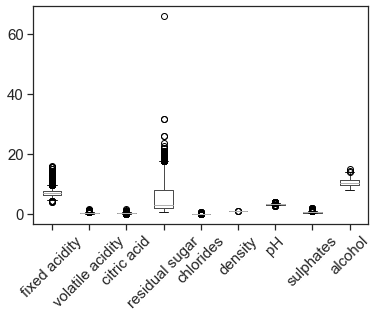

In [9]:
x = wine.drop(columns=['color', 'quality', 'free sulfur dioxide', 'total sulfur dioxide'])
pd.plotting.boxplot(x, grid=False, rot=45, fontsize=15)
#Even then, the remaining features have a wide range, so normalization will be critical.

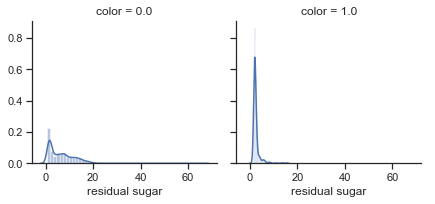

In [10]:
#Finding the outliers
g = sns.FacetGrid(wine, col="color")
g.map(sns.distplot, 'residual sugar',hist=True, kde=True)
g.add_legend();
#For the red wine, we can see less sugar on average comparing with its percentage in the white wine. 
#Also, it is clear that we have some outliers in the white wine with max value of 65.8 and average of 6.39!

In [12]:
wine_w[wine_w['residual sugar']==65.8] # Why?

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
2781,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,0.0


In [ ]:
wine_r['free sulfur dioxide'].describe()

In [ ]:
wine_w['free sulfur dioxide'].describe()

Similar to the residual sugar distribution, we can see for the white wine the range of the free sulfur dioxide extends till 289 mg/dm^3 which is pretty far away from its average of 35mg/dm^3. On the other hand, the range of the same feature in the red wine samples is: max = 72 and min = 1 and average of 15.  

In [ ]:
#is our dataset for wine quality balanced
wine.quality.unique()

It looks like that we have only 7 levels of quality among all wine samples we have!
Thus, most of the wine samples of both types (white and red) classified with quality in the range of {5,6,7}. 

In [ ]:
# Normalization
plt.figure()
wine.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8)

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:title={'center':'color'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

<Figure size 432x288 with 0 Axes>

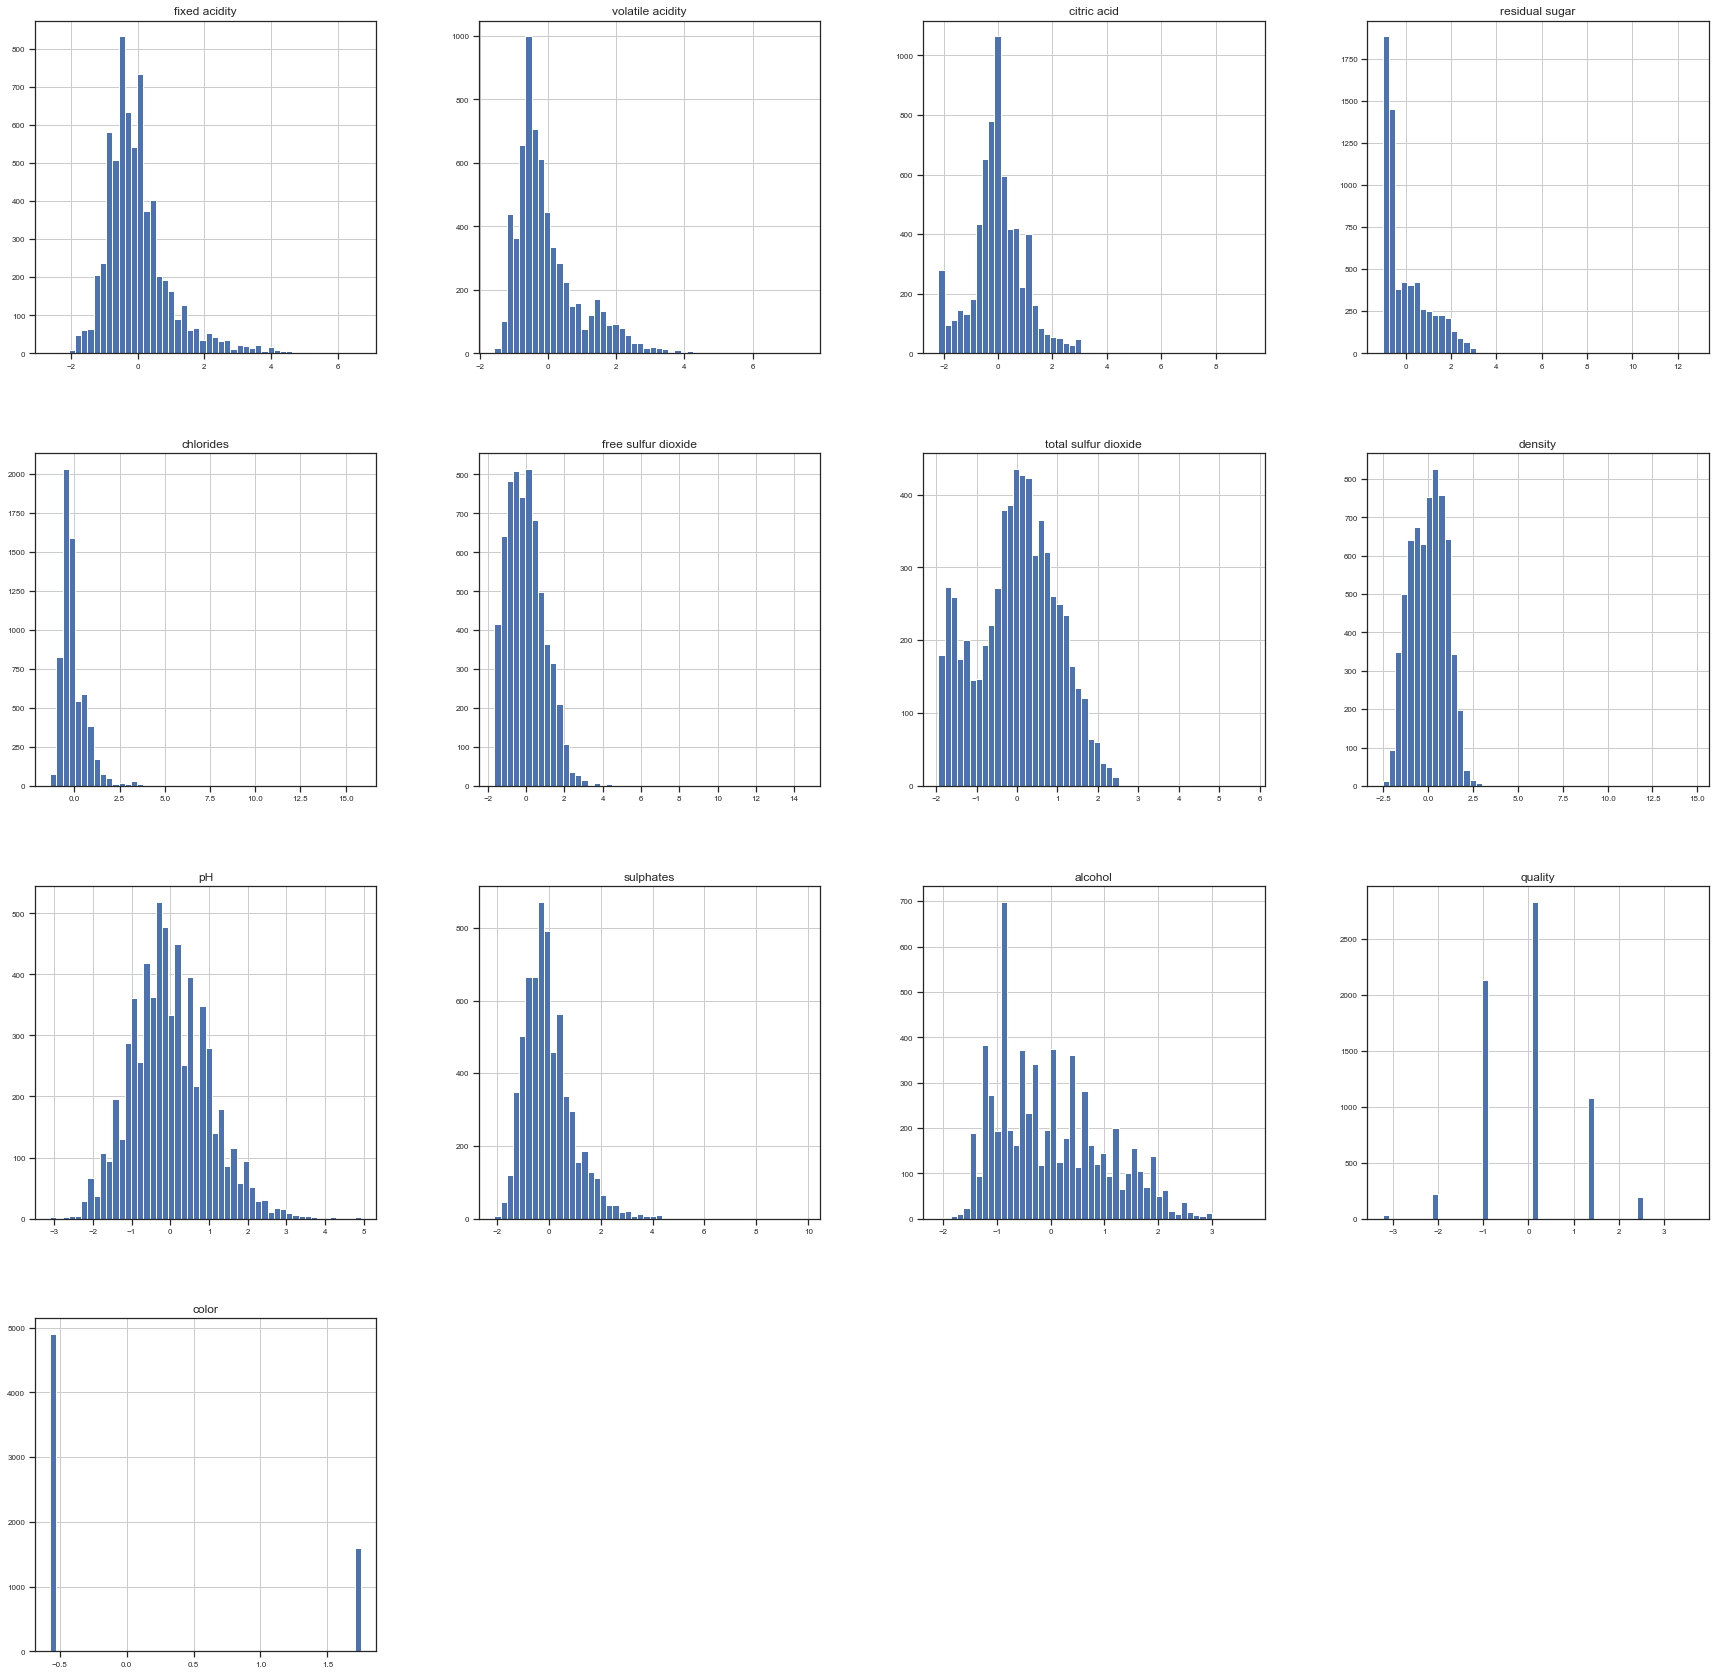

In [15]:
from scipy import stats
# Normalization with zscore
plt.figure()
wine_znormalized = wine.apply(stats.zscore) # Repeated ahead
wine_znormalized.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8)

It is very clear that the normalization still preserve the shape of the data for all predictors, however, on different scale. all data points were shifted to be centered around the zero and with unit variance)

We implement z-score normalization using the `sklearn.stats` package applied to the entire dataset. Then we once again select out the columns of interest. Note that the x and y variables do not need to be updated since they are just the names of the columns being used and they do not change across the three examples.

In [17]:
# Plot one feature value, sorted from low to high, against two others
x=['alcohol']; y=['pH','density']
w_aqc = wine[x+y]
w_aqc.sort_values(by=x, inplace=True)
display(w_aqc.describe())


,alcohol,pH,density
count,6497.000000,6497.000000,6497.000000
mean,10.491801,3.218501,0.994697
std,1.192712,0.160787,0.002999
min,8.000000,2.720000,0.987110
25%,9.500000,3.110000,0.992340
50%,10.300000,3.210000,0.994890
75%,11.300000,3.320000,0.996990
max,14.900000,4.010000,1.038980


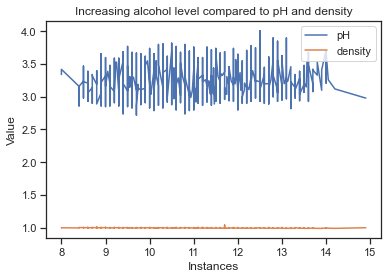

In [18]:
w_aqc.plot(x=x[0], y=y)
# w_aqc.hist(column=y, bins=10, alpha=.5)

plt.legend(loc='upper right')
plt.title('Increasing {} level compared to {} and {}'.format(x[0],y[0],y[1]))
plt.xlabel('Instances')
plt.ylabel('Value')
plt.legend(loc='upper right')

In [30]:
wine_zscore = wine.loc[:, ~wine.columns.isin(['quality', 'color'])].apply(stats.zscore)
wine_zscore["quality"] = wine["quality"]
wine_zscore["color"] = wine["color"]
w_aqc_zscore = wine_zscore[x+y]

w_aqc_zscore.sort_values(by=x, inplace=True)
display(w_aqc_zscore.describe())

,alcohol,pH,density
count,6.497000e+03,6.497000e+03,6.497000e+03
mean,-3.439863e-15,2.998610e-15,-5.780439e-15
std,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.089350e+00,-3.100615e+00,-2.530192e+00
25%,-8.316152e-01,-6.748622e-01,-7.859527e-01
50%,-1.608231e-01,-5.287424e-02,6.448888e-02
75%,6.776670e-01,6.313125e-01,7.648525e-01
max,3.696231e+00,4.923029e+00,1.476879e+01


In [33]:
wine_zscore.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,-0.166089,-0.423183,0.284686,3.206929,-0.314975,0.815565,0.959976,2.102214,-1.359049,-0.546178,-1.418558,6,0
1,-0.706073,-0.240949,0.147046,-0.807837,-0.200790,-0.931107,0.287618,-0.232332,0.506915,-0.277351,-0.831615,6,0
2,0.682458,-0.362438,0.559966,0.306208,-0.172244,-0.029599,-0.331660,0.134525,0.258120,-0.613385,-0.328521,6,0
3,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,6,0
4,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,6,0


In [ ]:
plt.figure()
w_aqc_zscore.sort_values(by=x, inplace=True)
w_aqc_zscore.plot(x=x[0], y=y)
plt.legend(loc='upper right')
plt.title('Increasing {} level compared to {} and {}'.format(x[0],y[0],y[1]))
plt.xlabel('Instances')
plt.ylabel('Value')
plt.legend(loc='upper right')

#### Using min-max Normalization
This we simply implement ourselves since the formula is straightforward. the min() and max() functions will produce vectors of the respective values for every feature, then the formula below will normalize all the values of the new wine-minmax matrix appropriately. 

In [34]:
wine_minmax = (wine-wine.min())/(wine.max()-wine.min())
wine_minmax["quality"] = wine["quality"]
wine_minmax["color"] = wine["color"]

w_aqc_minmax = wine_minmax[x+y]
display(w_aqc_minmax.describe())


,alcohol,pH,density
count,6497.000000,6497.000000,6497.000000
mean,0.361131,0.386435,0.146262
std,0.172857,0.124641,0.057811
min,0.000000,0.000000,0.000000
25%,0.217391,0.302326,0.100829
50%,0.333333,0.379845,0.149990
75%,0.478261,0.465116,0.190476
max,1.000000,1.000000,1.000000


In [35]:
wine_minmax.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,6,0
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,6,0
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,6,0
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,6,0
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,6,0


We can already see a significant difference here from the zscore summary tables, there are no very small or very large numbers any longer, these result from he large differences in scale and variance of the two feautures which zscore preserves.

In [ ]:
plt.figure()
w_aqc_minmax.sort_values(by=x, inplace=True)
w_aqc_minmax.plot(x=x[0], y=y)

plt.legend(loc='upper right')
plt.title('Increasing {} level compared to {} and {}'.format(x[0],y[0],y[1]))
plt.xlabel('Instances')
plt.ylabel('Value')
plt.legend(loc='upper right')

# Classification for KNN

## Abalone

In [ ]:
'''
Just for testing puposes. Will remove later
'''
# # Load the dataset
# abalone_dataframe = pd.read_csv("abalone.csv")

# '''
# The dataset had no columns. Therefore adding them from
# https://archive-beta.ics.uci.edu/ml/datasets/abalone
# '''
# abalone_dataframe.columns = ['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']

# abalone_dataframe['Sex'].nunique()
# abalone_dataframe['Sex'].unique()

# abalone_dataframe['Sex'] = abalone_dataframe['Sex'].replace(['M'],'0')
# abalone_dataframe['Sex'] = abalone_dataframe['Sex'].replace(['F'],'1')
# abalone_dataframe['Sex'] = abalone_dataframe['Sex'].replace(['I'],'2')

# abalone_dataframe.head()

# abalone_features = ['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']
# abalone_target = 'Rings'
# abalone_dataframe[abalone_target].unique()

In [ ]:
abalone_dataframe_unnormal = abalone_cat
abalone_dataframe_zscore = abalone_zscore
abalone_dataframe_minmax = abalone_cat_minmax

### 1. Divide the data into a training set and a test set (80%, 20%) Note: set the random seed for splitting, use random state=27 in the sci-kit learn train test split function to get the same split every time you run the program.

In [38]:
from sklearn.model_selection import train_test_split

def generate_train_test_splits(df,target):
    X = df.drop(target, axis = 1)
    y = df[target]

    # Train and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)
    return X_train, X_test, y_train, y_test

def analyze_train_test_splits(*args):
    for split in args:
        display(split.count())

In [ ]:
abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test = generate_train_test_splits(abalone_dataframe_zscore,abalone_target)
abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test = generate_train_test_splits(abalone_dataframe_minmax,abalone_target)

analyze_train_test_splits(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test)
analyze_train_test_splits(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test)

### 2. Start by training the model with the classifier’s default parameters. Use the train set and test the model on the test set. Note that different values of k will lead to different results.

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

def knn_classify(X_train, X_test, y_train, y_test,n=None,method=None): # Accepts train-test splits, value of k, method(for weighted KNN) as "e"(euclidean) or "m"(manhattan) and returns accuracy
    knn_args = {}
    if n is not None:
        knn_args['n_neighbors'] = n
    
    if method == "e":
        knn_args['weights'] = "distance"
        
    if method == "m":
        knn_args['weights'] = "distance"
        knn_args['metric'] = "manhattan"

    knn = KNeighborsClassifier(**knn_args)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test,predictions)
    return accuracy

def knn_analyze(predictions,y_test): # Just to analyze the predictions, confusion matrix
    print("\n*** Confusion Matrix ***\n")
    print(confusion_matrix(y_test,predictions))
    
    print("\n*** Classification Report ***\n")
    print(classification_report(y_test,predictions))
    
    accuracy = accuracy_score(y_test,predictions)
    
    print("\n*** Accuracy ***\n")
    print(accuracy)

In [ ]:
abalone_zscore_accuracy = knn_classify(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test)
abalone_minmax_accuracy = knn_classify(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test)

### 3. To find the best value for k, you need to compute accuracy for a range of values of k so you can “tune” the classifier. Using these scores, plot a figure of accuracy vs k. Report the best k in terms of classification accuracy.

In [ ]:
k_values = [1,5,10,15,20,25,30,35]

abalone_zscore_accuracies = []
abalone_minmax_accuracies = []

for k in k_values:
    acc1 = knn_classify(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test,k)
    acc2 = knn_classify(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test,k)
    
    abalone_zscore_accuracies.append(acc1)
    abalone_minmax_accuracies.append(acc2)

abalone_zscore_accuracies = [x*100 for x in abalone_zscore_accuracies]
abalone_minmax_accuracies = [x*100 for x in abalone_minmax_accuracies]

In [ ]:
plt.plot(k_values, abalone_zscore_accuracies, marker='o')
plt.plot(k_values, abalone_minmax_accuracies, marker='o')

plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.legend(["Zscore normalized","Minmax normalized"])

### 4. Improving on KNN: You can try to improve on your classification results using the method of weighted KNN. The KNeighborsClassifier class has an option for weighted KNN where points that are nearby to the query point are more important for the classification than others. Compare the three different weighting schemes (default, manhattan, euclidean) by plotting accuracy vs k for all three of them on the same figure to see the effect.

In [ ]:
## Storing the accuracies for different k-values and different weighting parameters
abalone_zscore_accuracies_manhattan = []
abalone_zscore_accuracies_euclidean = []

abalone_minmax_accuracies_manhattan = []
abalone_minmax_accuracies_euclidean = []

for k in k_values:
    acc1_m = knn_classify(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test,k,"m")
    acc1_e = knn_classify(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test,k,"e")
    
    acc2_m = knn_classify(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test,k,"m")
    acc2_e = knn_classify(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test,k,"e")
    
    abalone_zscore_accuracies_manhattan.append(acc1_m)
    abalone_zscore_accuracies_euclidean.append(acc1_e)

    abalone_minmax_accuracies_manhattan.append(acc2_m)
    abalone_minmax_accuracies_euclidean.append(acc2_e)

In [ ]:
abalone_zscore_accuracies_manhattan = [x*100 for x in abalone_zscore_accuracies_manhattan] 
abalone_zscore_accuracies_euclidean = [x*100 for x in abalone_zscore_accuracies_euclidean] 

abalone_minmax_accuracies_manhattan = [x*100 for x in abalone_minmax_accuracies_manhattan] 
abalone_minmax_accuracies_euclidean = [x*100 for x in abalone_minmax_accuracies_euclidean] 

In [ ]:
def accuracy_plot(default,manhattan,euclidean):
    plt.plot(k_values, default, label='Default', marker='o')
    plt.plot(k_values, manhattan, label="Manhattan", marker='o')
    plt.plot(k_values, euclidean, label="Euclidean", marker='o')

    plt.xlabel("k values")
    plt.ylabel("Accuracy")
    plt.legend(["Default","Manhattan","Euclidean"])
    plt.show()

print("*** Plot for Zscore normalized values ***")
accuracy_plot(abalone_zscore_accuracies,abalone_zscore_accuracies_manhattan,abalone_zscore_accuracies_euclidean)

print("*** Plot for Minmax normalized values ***")
accuracy_plot(abalone_minmax_accuracies,abalone_minmax_accuracies_manhattan,abalone_minmax_accuracies_euclidean)

### 5 Ablation Study on Normalization: An ablation study is where some aspect of the model or analysis is dropped, in order to see what its effect was on the entire outcome. We can do a simple form of ablation here by removing normalization from our pipeline. Replot the three curves from the previous question on weighted KNN, but this time remove the normalization step from the preprocessing. Comment on the difference, was normalization effective or necessary in this case?

In [ ]:
abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test = generate_train_test_splits(abalone_dataframe_unnormal,abalone_target)
# analyze_train_test_splits(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test)
abalone_unnormal_accuracy = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test)

abalone_unnormal_accuracies = []
for k in k_values:
    acc1 = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test,k)
    abalone_unnormal_accuracies.append(acc1)    
    
abalone_unnormal_accuracies = [x*100 for x in abalone_unnormal_accuracies]

plt.plot(k_values, abalone_unnormal_accuracies, marker='o')
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.show()

abalone_unnormal_accuracies_manhattan = []
abalone_unnormal_accuracies_euclidean = []

for k in k_values:
    acc1_m = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test,k,"m")
    acc1_e = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test,k,"e")
    abalone_unnormal_accuracies_manhattan.append(acc1_m)
    abalone_unnormal_accuracies_euclidean.append(acc1_e)

abalone_unnormal_accuracies_manhattan = [x*100 for x in abalone_unnormal_accuracies_manhattan] 
abalone_unnormal_accuracies_euclidean = [x*100 for x in abalone_unnormal_accuracies_euclidean]

print("*** Plot for Unnormalized values ***")
accuracy_plot(abalone_unnormal_accuracies,abalone_unnormal_accuracies_manhattan,abalone_unnormal_accuracies_euclidean)

## Wine

In [47]:
wine_target1 = "quality"
wine_target2 = "color"

wine_quality_dataframe_unnormal = wine.drop(wine_target2,axis=1)
wine_quality_dataframe_zscore = wine_zscore.drop(wine_target2,axis=1)
wine_quality_dataframe_minmax = wine_minmax.drop(wine_target2,axis=1)

wine_color_dataframe_unnormal = wine.drop(wine_target1,axis=1)
wine_color_dataframe_zscore = wine_zscore.drop(wine_target1,axis=1)
wine_color_dataframe_minmax = wine_minmax.drop(wine_target1,axis=1)



wine_quality_dataframe_zscore.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.166089,-0.423183,0.284686,3.206929,-0.314975,0.815565,0.959976,2.102214,-1.359049,-0.546178,-1.418558,6
1,-0.706073,-0.240949,0.147046,-0.807837,-0.200790,-0.931107,0.287618,-0.232332,0.506915,-0.277351,-0.831615,6
2,0.682458,-0.362438,0.559966,0.306208,-0.172244,-0.029599,-0.331660,0.134525,0.258120,-0.613385,-0.328521,6
3,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,6
4,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,6


### 1. Divide the data into a training set and a test set (80%, 20%) Note: set the random seed for splitting, use random state=27 in the sci-kit learn train test split function to get the same split every time you run the program.

In [49]:
# Quality
wine_quality_zscore_X_train, wine_quality_zscore_X_test, wine_quality_zscore_y_train, wine_quality_zscore_y_test = generate_train_test_splits(wine_quality_dataframe_zscore,wine_target1)
wine_quality_minmax_X_train, wine_quality_minmax_X_test, wine_quality_minmax_y_train, wine_quality_minmax_y_test = generate_train_test_splits(wine_quality_dataframe_minmax,wine_target1)

analyze_train_test_splits(wine_quality_zscore_X_train, wine_quality_zscore_X_test, wine_quality_zscore_y_train, wine_quality_zscore_y_test)
analyze_train_test_splits(wine_quality_minmax_X_train, wine_quality_minmax_X_test, wine_quality_minmax_y_train, wine_quality_minmax_y_test)

# Color
wine_color_zscore_X_train, wine_color_zscore_X_test, wine_color_zscore_y_train, wine_color_zscore_y_test = generate_train_test_splits(wine_color_dataframe_zscore,wine_target2)
wine_color_minmax_X_train, wine_color_minmax_X_test, wine_color_minmax_y_train, wine_color_minmax_y_test = generate_train_test_splits(wine_color_dataframe_minmax,wine_target2)

analyze_train_test_splits(wine_color_zscore_X_train, wine_color_zscore_X_test, wine_color_zscore_y_train, wine_color_zscore_y_test)
analyze_train_test_splits(wine_color_minmax_X_train, wine_color_minmax_X_test, wine_color_minmax_y_train, wine_color_minmax_y_test)

fixed acidity           5197
volatile acidity        5197
citric acid             5197
residual sugar          5197
chlorides               5197
free sulfur dioxide     5197
total sulfur dioxide    5197
density                 5197
pH                      5197
sulphates               5197
alcohol                 5197
dtype: int64

fixed acidity           1300
volatile acidity        1300
citric acid             1300
residual sugar          1300
chlorides               1300
free sulfur dioxide     1300
total sulfur dioxide    1300
density                 1300
pH                      1300
sulphates               1300
alcohol                 1300
dtype: int64

5197

1300

fixed acidity           5197
volatile acidity        5197
citric acid             5197
residual sugar          5197
chlorides               5197
free sulfur dioxide     5197
total sulfur dioxide    5197
density                 5197
pH                      5197
sulphates               5197
alcohol                 5197
dtype: int64

fixed acidity           1300
volatile acidity        1300
citric acid             1300
residual sugar          1300
chlorides               1300
free sulfur dioxide     1300
total sulfur dioxide    1300
density                 1300
pH                      1300
sulphates               1300
alcohol                 1300
dtype: int64

5197

1300

fixed acidity           5197
volatile acidity        5197
citric acid             5197
residual sugar          5197
chlorides               5197
free sulfur dioxide     5197
total sulfur dioxide    5197
density                 5197
pH                      5197
sulphates               5197
alcohol                 5197
dtype: int64

fixed acidity           1300
volatile acidity        1300
citric acid             1300
residual sugar          1300
chlorides               1300
free sulfur dioxide     1300
total sulfur dioxide    1300
density                 1300
pH                      1300
sulphates               1300
alcohol                 1300
dtype: int64

5197

1300

fixed acidity           5197
volatile acidity        5197
citric acid             5197
residual sugar          5197
chlorides               5197
free sulfur dioxide     5197
total sulfur dioxide    5197
density                 5197
pH                      5197
sulphates               5197
alcohol                 5197
dtype: int64

fixed acidity           1300
volatile acidity        1300
citric acid             1300
residual sugar          1300
chlorides               1300
free sulfur dioxide     1300
total sulfur dioxide    1300
density                 1300
pH                      1300
sulphates               1300
alcohol                 1300
dtype: int64

5197

1300

### 2. Start by training the model with the classifier’s default parameters. Use the train set and test the model on the test set. Note that different values of k will lead to different results.

In [51]:
wine_quality_zscore_accuracy = knn_classify(wine_quality_zscore_X_train, wine_quality_zscore_X_test, wine_quality_zscore_y_train, wine_quality_zscore_y_test)
wine_quality_minmax_accuracy = knn_classify(wine_quality_minmax_X_train, wine_quality_minmax_X_test, wine_quality_minmax_y_train, wine_quality_minmax_y_test)

wine_color_zscore_accuracy = knn_classify(wine_color_zscore_X_train, wine_color_zscore_X_test, wine_color_zscore_y_train, wine_color_zscore_y_test)
wine_color_minmax_accuracy = knn_classify(wine_color_minmax_X_train, wine_color_minmax_X_test, wine_color_minmax_y_train, wine_color_minmax_y_test)

### 3. To find the best value for k, you need to compute accuracy for a range of values of k so you can “tune” the classifier. Using these scores, plot a figure of accuracy vs k. Report the best k in terms of classification accuracy.

In [55]:
k_values = [5,10,15,20,25,30,35]
wine_quality_zscore_accuracies = []
wine_quality_minmax_accuracies = []

wine_color_zscore_accuracies = []
wine_color_minmax_accuracies = []

for k in k_values:
    acc1 = knn_classify(wine_quality_zscore_X_train, wine_quality_zscore_X_test, wine_quality_zscore_y_train, wine_quality_zscore_y_test,k)
    acc2 = knn_classify(wine_quality_minmax_X_train, wine_quality_minmax_X_test, wine_quality_minmax_y_train, wine_quality_minmax_y_test,k)
    
    wine_quality_zscore_accuracies.append(acc1)
    wine_quality_minmax_accuracies.append(acc2)

    acc1 = knn_classify(wine_color_zscore_X_train, wine_color_zscore_X_test, wine_color_zscore_y_train, wine_color_zscore_y_test,k)
    acc2 = knn_classify(wine_color_minmax_X_train, wine_color_minmax_X_test, wine_color_minmax_y_train, wine_color_minmax_y_test,k)
    
    wine_color_zscore_accuracies.append(acc1)
    wine_color_minmax_accuracies.append(acc2)

wine_quality_zscore_accuracies = [x*100 for x in wine_quality_zscore_accuracies]
wine_quality_minmax_accuracies = [x*100 for x in wine_quality_minmax_accuracies]

wine_color_zscore_accuracies = [x*100 for x in wine_color_zscore_accuracies]
wine_color_minmax_accuracies = [x*100 for x in wine_color_minmax_accuracies]

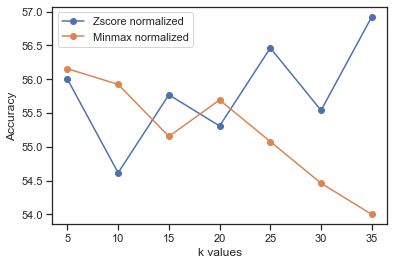

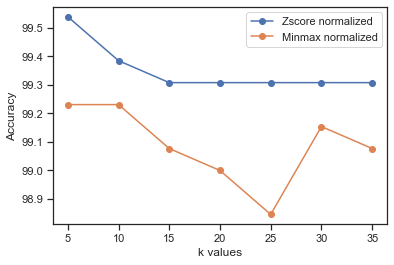

In [56]:
plt.plot(k_values, wine_quality_zscore_accuracies, marker='o')
plt.plot(k_values, wine_quality_minmax_accuracies, marker='o')

plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.legend(["Zscore normalized","Minmax normalized"])
plt.show()

plt.plot(k_values, wine_color_zscore_accuracies, marker='o')
plt.plot(k_values, wine_color_minmax_accuracies, marker='o')

plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.legend(["Zscore normalized","Minmax normalized"])

### 4. Improving on KNN: You can try to improve on your classification results using the method of weighted KNN. The KNeighborsClassifier class has an option for weighted KNN where points that are nearby to the query point are more important for the classification than others. Compare the three different weighting schemes (default, manhattan, euclidean) by plotting accuracy vs k for all three of them on the same figure to see the effect.

In [ ]:
## Storing the accuracies for different k-values and different weighting parameters
abalone_zscore_accuracies_manhattan = []
abalone_zscore_accuracies_euclidean = []

abalone_minmax_accuracies_manhattan = []
abalone_minmax_accuracies_euclidean = []

for k in k_values:
    acc1_m = knn_classify(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test,k,"m")
    acc1_e = knn_classify(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test,k,"e")
    
    acc2_m = knn_classify(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test,k,"m")
    acc2_e = knn_classify(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test,k,"e")
    
    abalone_zscore_accuracies_manhattan.append(acc1_m)
    abalone_zscore_accuracies_euclidean.append(acc1_e)

    abalone_minmax_accuracies_manhattan.append(acc2_m)
    abalone_minmax_accuracies_euclidean.append(acc2_e)

In [ ]:
abalone_zscore_accuracies_manhattan = [x*100 for x in abalone_zscore_accuracies_manhattan] 
abalone_zscore_accuracies_euclidean = [x*100 for x in abalone_zscore_accuracies_euclidean] 

abalone_minmax_accuracies_manhattan = [x*100 for x in abalone_minmax_accuracies_manhattan] 
abalone_minmax_accuracies_euclidean = [x*100 for x in abalone_minmax_accuracies_euclidean] 

In [ ]:
def accuracy_plot(default,manhattan,euclidean):
    plt.plot(k_values, default, label='Default', marker='o')
    plt.plot(k_values, manhattan, label="Manhattan", marker='o')
    plt.plot(k_values, euclidean, label="Euclidean", marker='o')

    plt.xlabel("k values")
    plt.ylabel("Accuracy")
    plt.legend(["Default","Manhattan","Euclidean"])
    plt.show()

print("*** Plot for Zscore normalized values ***")
accuracy_plot(abalone_zscore_accuracies,abalone_zscore_accuracies_manhattan,abalone_zscore_accuracies_euclidean)

print("*** Plot for Minmax normalized values ***")
accuracy_plot(abalone_minmax_accuracies,abalone_minmax_accuracies_manhattan,abalone_minmax_accuracies_euclidean)